In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

We will fit an ARX model of this form to a step, rectangular pulse and doublet response.

$$y(k) = a_1 y(k - 1) + a_2 y(k - 2) + b_1 u(k - 1) + b_2 u(k - 2)$$

### The Data was generated using a TCLab model and the input to Q1 was altered while keeping Q2 zero.

Adjusting Data

In [54]:
#Step response
df = pandas.read_csv('Step1.csv')
df.loc[-1] = [0, 20.95, 20.95, 0, 0]
df = df.sort_index()


In [69]:
# Rectangular pulse response
df1 = pandas.read_csv('Rpi1_Q1_only.csv')
df1.loc[-1] = [0, 20.95, 20.95, 0, 0]
df1 = df1.sort_index()

In [76]:
# Doublet response
df2 = pandas.read_csv('Doublet1_Q1_only.csv')
df2.loc[-1] = [0, 20.95, 20.95, 0, 0]
df2 = df2.sort_index()

### Generating Matrices

In [55]:
# Step response
y = df.T1
u = df.Q1

Y = []
X = []
for k in range(1, len(df)-1):
    Y.append([y[k]])
    X.append([y[k - 1], y[k - 2], u[k - 1], u[k - 2]])
Y = numpy.array(Y)
X = numpy.array(X)

In [70]:
# Rectangular pulse response
y1 = df1.T1
u1 = df1.Q1

Y1 = []
X1 = []
for k in range(1, len(df1)-1):
    Y1.append([y1[k]])
    X1.append([y1[k - 1], y1[k - 2], u1[k - 1], u1[k - 2]])
Y1 = numpy.array(Y1)
X1 = numpy.array(X1)

In [77]:
# Doublet response
y2 = df2.T1
u2 = df2.Q1

Y2 = []
X2 = []
for k in range(1, len(df2)-1):
    Y2.append([y2[k]])
    X2.append([y2[k - 1], y2[k - 2], u2[k - 1], u2[k - 2]])
Y2 = numpy.array(Y2)
X2 = numpy.array(X2)

### Solving for $\beta$

In [56]:
# Step response
beta, _, _, _ = numpy.linalg.lstsq(X,Y, rcond=None)
a1, a2, b1, b2 = beta[0,0], beta[1, 0], beta[2, 0], beta[3,0]


In [71]:
# Rectangular pulse response
beta1, _, _, _ = numpy.linalg.lstsq(X1,Y1, rcond=None)
a11, a21, b11, b21 = beta1[0,0], beta1[1, 0], beta1[2, 0], beta1[3,0]


In [78]:
# Doublet response
beta2, _, _, _ = numpy.linalg.lstsq(X2,Y2, rcond=None)
a12, a22, b12, b22 = beta2[0,0], beta2[1, 0], beta2[2, 0], beta2[3,0]


### Use above solution and the ARX model to create predictions

In [57]:
# Step response
y_arx = []
for k in range(1, len(df)):
    y_arx.append(a1*y[k-1] + a2*y[k-2] + b1*u[k-1] + b2*u[k-2])

In [72]:
# Rectangular pulse response
y_arx1 = []
for k in range(1, len(df1)):
    y_arx1.append(a11*y1[k-1] + a21*y1[k-2] + b11*u1[k-1] + b21*u1[k-2])

In [79]:
# Doublet response
y_arx2 = []
for k in range(1, len(df2)):
    y_arx2.append(a12*y2[k-1] + a22*y2[k-2] + b12*u2[k-1] + b22*u2[k-2])

### Plotting observation versus prediction

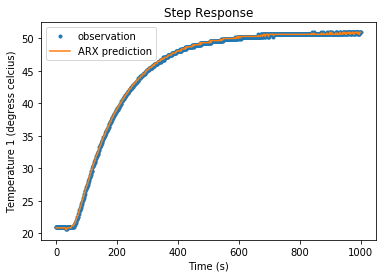

In [81]:
t = numpy.arange(len(df)-1)
plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_arx, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Step Response")
plt.legend()
plt.show()

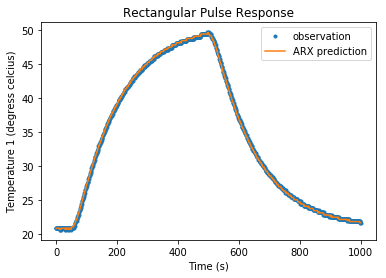

In [82]:
plt.plot(df1.Time, df1.T1, '.', label = 'observation')
plt.plot(t, y_arx1, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Rectangular Pulse Response")
plt.legend()
plt.show()

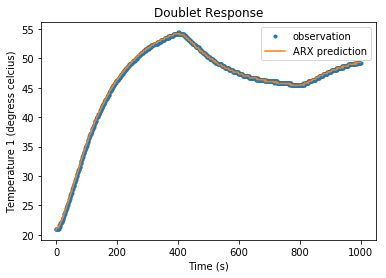

In [83]:
plt.plot(df2.Time, df2.T1, '.', label = 'observation')
plt.plot(t, y_arx2, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Doublet Response")
plt.legend()
plt.show()

In [68]:
# What about T2?